In [211]:
import numpy as np 
import pandas as pd 
import seaborn as sns


In [212]:
df_train = pd.read_csv(r"train.csv")
df_test = pd.read_csv(r"test.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [213]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [214]:
(df_train.isnull().sum() / len(df_train) * 100).round(2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [215]:
(df_test.isnull().sum() / len(df_test) * 100).round(2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

In [216]:
# drop Cabin and predict missing vales of Age
df_train = df_train.drop('Cabin', axis=1).dropna(subset=['Embarked'])

df_test = df_test.drop('Cabin', axis=1).dropna(subset=['Embarked'])


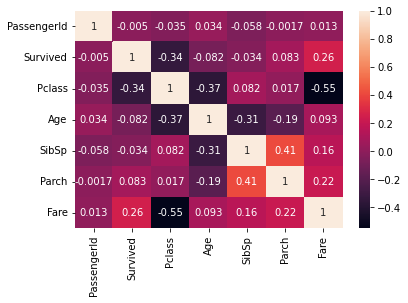

In [217]:
# Age is highly related to  ['Pclass','SibSp','Parch'], so we use these features to predict the missing value of Age
sns.heatmap(df_train.corr(), annot=True)
feature_age = ['Pclass','Sex','SibSp','Parch','Fare','Embarked']

In [218]:
# predict Age
from sklearn.ensemble import RandomForestRegressor
age_train = df_train[df_train['Age'].notnull()]
age_test = df_train[df_train['Age'].isnull()]

In [219]:
X_age = age_train[feature_age]
y_age = age_train['Age']
X_age = pd.get_dummies(X_age, drop_first=True, dtype=int)
X_age_test = pd.get_dummies(age_test[feature_age], drop_first=True, dtype=int)

In [220]:
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_age, y_age)
print(rfr.feature_importances_)
age_pred = rfr.predict(X_age_test).round(1)

[0.17345981 0.14446798 0.17553694 0.39284239 0.05831442 0.01425411
 0.04112434]


In [221]:
df_train.loc[df_train['Age'].isnull(), 'Age'] = age_pred


**Test data**

In [222]:
# predict Age
from sklearn.ensemble import RandomForestRegressor
age_train = df_test[df_test['Age'].notnull()]
age_test = df_test[df_test['Age'].isnull()]

In [223]:
X_age = age_train[feature_age]
y_age = age_train['Age']
X_age = pd.get_dummies(X_age, drop_first=True, dtype=int)
X_age_test = pd.get_dummies(age_test[feature_age], drop_first=True, dtype=int)


X_age['Fare'].fillna(0, inplace=True)

In [224]:
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_age, y_age)
print(rfr.feature_importances_)
age_pred = rfr.predict(X_age_test).round(1)

[0.2789975  0.07616804 0.14349067 0.37919851 0.06235884 0.0195405
 0.04024593]


In [225]:
df_test.loc[df_test['Age'].isnull(), 'Age'] = age_pred

In [146]:
print(df_train[['Sex','Survived']].value_counts())
sns.countplot(count_data, x='Sex', hue='Survived')

Sex     Survived
male    0           468
female  1           231
male    1           109
female  0            81
dtype: int64


c:\Users\hpalm\anaconda3\envs\tfradeon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: Could not interpret input 'Survived'

In [129]:
sns.countplot(df_train, x='Embarked', hue='Survived')


ValueError: Could not interpret input 'Survived'

In [130]:
sns.scatterplot(df_train, x='Age', y='Fare', hue='Survived')

ValueError: Could not interpret value `Survived` for parameter `hue`

In [131]:
sns.barplot(df_train, x='Pclass', y='Age', hue='Survived')

ValueError: Could not interpret input 'Age'

In [226]:
# # data preprocessing
df_train = df_train.drop(['PassengerId','Name','Ticket'], axis=1)
df_train = pd.get_dummies(df_train, columns=['Pclass','Sex','Embarked'], drop_first=True, dtype=int)
# # create X, y data
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']


In [228]:
# # data preprocessing
df_test = df_test.drop(['PassengerId','Name','Ticket'], axis=1)
df_test = pd.get_dummies(df_test, columns=['Pclass','Sex','Embarked'], drop_first=True, dtype=int)
# # create X, y data
#X_test = df_test.drop('Survived', axis=1)
#y_test = df_test['Survived']


In [230]:
df_test

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0
3,27.0,0,0,8.6625,0,1,1,0,1
4,22.0,1,1,12.2875,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
413,26.9,0,0,8.0500,0,1,1,0,1
414,39.0,0,0,108.9000,0,0,0,0,0
415,38.5,0,0,7.2500,0,1,1,0,1
416,26.9,0,0,8.0500,0,1,1,0,1


In [232]:
df_test.fillna(0, inplace=True)

In [233]:
nan_counts = df_test.isna().sum()

# Print the result
print(nan_counts)

Age           0
SibSp         0
Parch         0
Fare          0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [234]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X, y)



rf_pred = rf.predict(df_test)



In [236]:
df_test = pd.read_csv(r"test.csv")

In [237]:
output = pd.DataFrame({'PassengerID': df_test.PassengerId, 'Survived': rf_pred})

output.to_csv('submission2.csv',index=False) 

# **Assume all women survived**

In [28]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived: ", rate_women)

% of women who survived:  0.7420382165605095


In [29]:
men = df_train.loc[df_train.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


# **Random forest model**

In [30]:
from sklearn.ensemble import RandomForestClassifier

y = df_train['Survived']

feature = ['Pclass','Sex','Age','SibSp','Parch']

X = pd.get_dummies(df_train[feature])
X_test = pd.get_dummies(df_test[feature])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

model.fit(X,y)

predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerID': df_test.PassengerId, 'Survived': predictions})

output.to_csv('submission2.csv',index=False) 

# **Logist Regression Model**

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import MinMaxScaler

In [6]:
y = df_train['Survived']

feature = ['Pclass','Sex','Age','SibSp','Parch','Embarked']

X = pd.get_dummies(df_train[feature])
X_test = pd.get_dummies(df_test[feature])

# X = df_train[feature]
# X_test = df_test[feature]


In [8]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

# # X['Sex'] = label_encoder.fit_transform(X['Sex'])
# X['Embarked'] = label_encoder.fit_transform(X['Embarked'])

# # X_test['Sex'] = label_encoder.fit_transform(X_test['Sex'])
# X_test['Embarked'] = label_encoder.fit_transform(X_test['Embarked'])

KeyError: 'Embarked'

In [11]:
scaler = MinMaxScaler()

X['Age'] = scaler.fit_transform(X[['Age']])
X_test['Age'] = scaler.fit_transform(X_test[['Age']])

In [12]:
X

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.2750,1,0,0,1,0,0,1
1,1,0.4750,1,0,1,0,1,0,0
2,3,0.3250,0,0,1,0,0,0,1
3,1,0.4375,1,0,1,0,0,0,1
4,3,0.4375,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0.3375,0,0,0,1,0,0,1
887,1,0.2375,0,0,1,0,0,0,1
888,3,0.0000,1,2,1,0,0,0,1
889,1,0.3250,0,0,0,1,1,0,0


In [13]:
parameters_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}


model = LogisticRegression()


# grid search 
grid_search = GridSearchCV(model, parameters_grid, cv=5)

grid_search.fit(X,y)

best_C = grid_search.best_params_['C']

In [14]:
model = LogisticRegression(C=best_C)

model.fit(X,y)

predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerID': df_test.PassengerId, 'Survived': predictions})

In [16]:
output.to_csv('submission_C4.csv',index=False) 